# Real time test

In [1]:
import sys
sys.path.insert(1, '/home/ubuntu/gechen/software/burstfit/examples/')
import import_ipynb
import BurstFit_paper_template as paper_fit

from burstfit.utils.functions import pulse_fn, sgram_fn_vec, sgram_fn, gauss, gauss_norm, model_free_4, model_free_normalized_4, power_law # pulse_fn_vec  
from burstfit.utils.plotter import plot_fit_results
import numpy as np

%matplotlib inline 

importing Jupyter notebook from BurstFit_paper_template.ipynb


/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg/burstfit/utils/plotter.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/home/ubuntu/anac

datacite/tind env not found. Cannot use datacite API


In [2]:
# input variables 
candidate = '220330aaan'
datestring = '2022_3_29_23_4_54'
beam = 164
corr = 'corr09'
snr_heimdall = 12.9
dm_heimdall = 467.8
width_heimdall = 32 

voltage = False 
dedisperse = True 
mask_chans=[] 
nfreq = 4 
fil_file_dedispersed = '/home/ubuntu/gechen/software/burstfit/fil_files_dedispersed/%s_%d_%s.txt'%(candidate, nfreq, str(voltage))



2022-06-27 20:36:16,956 - prepare_data -burstfit.data - INFO - Preparing data for burst fitting.
2022-06-27 20:36:17,091 - crop_dedispersed_data -burstfit.data - INFO - Cropping data with time_window: 0.2s.
2022-06-27 20:36:17,093 - normalise_data -burstfit.data - INFO - Normalising data using off pulse mean and std.
2022-06-27 20:36:17,144 - normalise_data -burstfit.data - INFO - Off pulse mean and std are: (36.063605401529635, 21.164850863543236)


using filterbank  /data/dsa110/T1/corr09/2022_3_29_23_4_54/fil_220330aaan/220330aaan_164.fil
Only using Heimdall filterbank.
0.5 0.000262144 5 32 1747 2067
1747 2067 320 (4, 320)


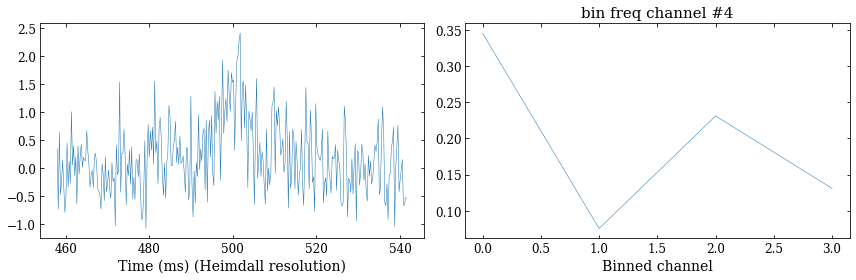

In [3]:
bd_heimdall, fil_file_heimdall  = paper_fit.prepare_bd(candidate, dm_heimdall, width_heimdall, snr_heimdall, 
                           datestring=datestring, beam=beam, corr=corr, 
                           voltage=False)


data_burst, i_low, i_high = paper_fit.prepare_burst_data_heimdall_only(fil_file_heimdall, fil_file_dedispersed, 
                                                        candidate, bd_heimdall, 
                                                       t_chop_width = 5, dedisperse=dedisperse)



self.function_input_names:  ['S', 'mu', 'sigma', 'tau']
self.function_input_names:  ['c0', 'c1', 'c2']


2022-06-27 20:36:19,015 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-27 20:36:19,017 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-27 20:36:19,021 - tests -root - INFO - P values: T-test (0.94271), Kruskal (0.90986), KS (0.77281), F-test (0.09014)
2022-06-27 20:36:19,023 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-06-27 20:36:19,028 - tests -root - INFO - P values: T-test (0.00000), Kruskal (0.00000), KS (0.00000), F-test (0.00000)
2022-06-27 20:36:19,029 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-06-27 20:36:19,033 - tests -root - INFO - P values: T-test (0.00000), Kruskal (0.00000), KS (0.00000), F-test (0.00003)
2022-06-27 20:36:19,036 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 1
2022-06-27 20:36:19,037 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2022-06-27 20:36:19,039 - initial_profi

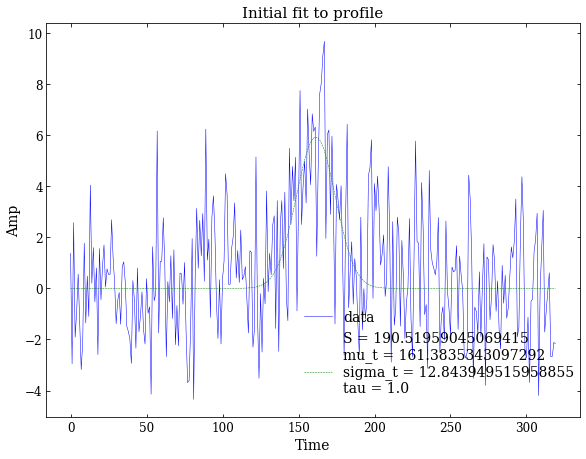

2022-06-27 20:36:19,298 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-27 20:36:19,306 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_normalized_4 at 0x7fb61a930268>
[0.39878002 0.23669735 0.47927672 0.16927181]


2022-06-27 20:36:19,312 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-27 20:36:19,313 - initial_spectrafit -burstfit.fit - INFO - c0: 0.3987800180912018 +- 0.0
2022-06-27 20:36:19,315 - initial_spectrafit -burstfit.fit - INFO - c1: 0.23669734597206116 +- 0.0
2022-06-27 20:36:19,317 - initial_spectrafit -burstfit.fit - INFO - c2: 0.47927671670913696 +- 0.0


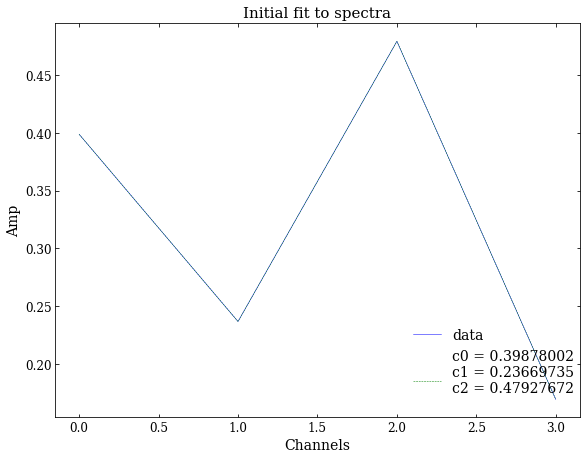

2022-06-27 20:36:19,456 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-06-27 20:36:19,459 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.39878002, 0.23669735, 0.47927672, 190.51959045069415, 161.3835343097292, 12.843949515958855, 1.0, 467.8]
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
2022-06-27 20:36:19,504 - run_fit -burstfit.curvefit - WARNING - Fit errors are not finite. Retrying with p0+-(0.2*p0) bounds
2022-06-27 20:36:19,851 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-27 20:36:19,853 - sgram_fit -burstfit.fit - INFO - c0: 0.3819557881701074 +- 0.039414699350632305
2022-06-27 20:36:19,855 - sgram_fit -burstfit.fit - INFO - c1: 0.24634351990731335 +- 0.03221056654570678
2022-06-27 20:36:19,856 - sgram_fit -burstfit.fit - INFO - c2: 0.4706683912134836 +- 0

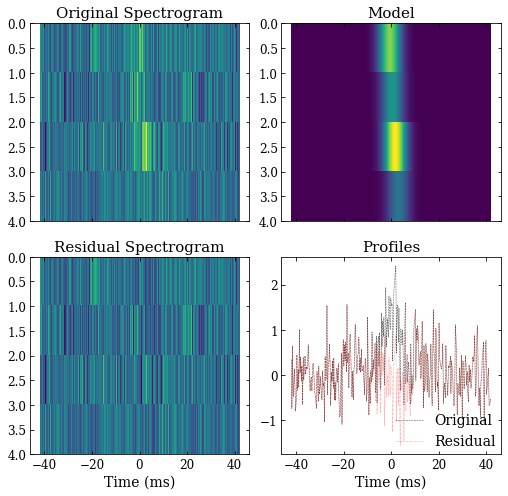

2022-06-27 20:36:20,252 - model -burstfit.fit - INFO - Making model.
2022-06-27 20:36:20,255 - model -burstfit.fit - INFO - Found 1 components.
2022-06-27 20:36:20,259 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-27 20:36:20,261 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-27 20:36:20,264 - model -burstfit.fit - INFO - Making model.
2022-06-27 20:36:20,266 - model -burstfit.fit - INFO - Found 1 components.
2022-06-27 20:36:20,269 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.2300534166419113
2022-06-27 20:36:20,271 - fitall -burstfit.fit - INFO - Fixed component exceeded. Terminated individual component fitting.
2022-06-27 20:36:20,272 - fitall -burstfit.fit - INFO - Final number of components = 1. Terminating fitting.
2022-06-27 20:36:20,274 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to

{bf}.calc_redchisq()= (1.2300534166419113, 2.9571803894512527e-08)


In [4]:
profile_bounds=[(0, 0.5 / bd_heimdall.tsamp - i_low - bd_heimdall.width, 0, 0),(np.inf, 0.5 / bd_heimdall.tsamp - i_low + bd_heimdall.width, 5 * bd_heimdall.width, np.inf)]

bf_S1T2_c1 = paper_fit.fit_paper_curvefit(bd_heimdall, data_burst, ['S', 'mu_t', 'sigma_t', 'tau'], pulse_fn, 
          profile_bounds, 
          ['c0', 'c1', 'c2'], model_free_normalized_4, fix_ncomp = True, ncomp = 1, plot = True)


In [23]:
# p-value 
bf_S1T2_c1.reduced_chi_sq
print(np.shape(data_burst)[0] * np.shape(data_burst)[1], bf_S1T2_c1.sgram.size, int(4*(0.540-0.460)/bd_heimdall.tsamp))
print(bf_S1T2_c1.reduced_chi_sq * (bf_S1T2_c1.sgram.size - 3))
print(bf_S1T2_c1.p_value)

dm_fit, dm_fit_err = bf_S1T2_c1.sgram_params['all'][1]['popt'][-1], bf_S1T2_c1.sgram_params['all'][1]['perr'][-1]
dm_fit, dm_fit_err

1280 1280 1220
1570.7782130517207
2.9571803894512527e-08


NameError: name 'save_name' is not defined

FileNotFoundError: [Errno 2] No such file or directory: '/dataz/dsa110/operations/candidates/220330aaan/other/bf1_220330aaan_fit_results.png'

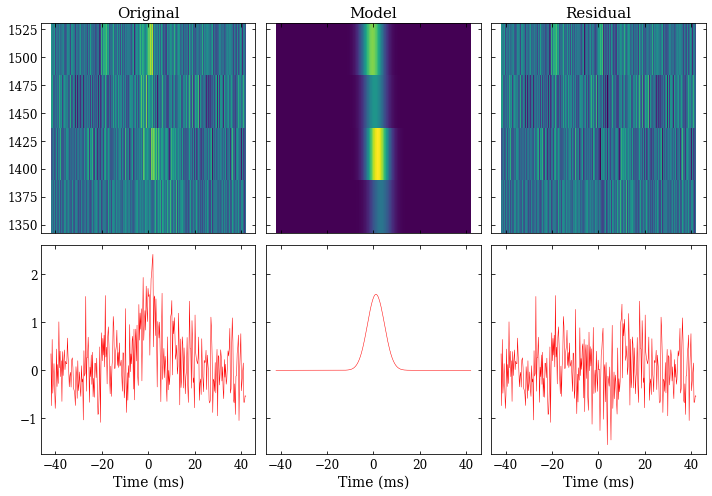

In [27]:
plot_fit_results(bf_S1T2_c1.sgram, bf_S1T2_c1.sgram_model.evaluate, bf_S1T2_c1.sgram_params['all'][1]['popt'], 
                  bf_S1T2_c1.tsamp, bf_S1T2_c1.fch1, bf_S1T2_c1.foff, show=True, save=True, 
                 outname = 'bf1_' + candidate, 
                 outdir='/dataz/dsa110/operations/candidates/' + candidate + '/other')
candidate

width_samp, width_samp_fine_pow2, bin_num =  31 128 119
64
128
256
512
1024
fine resolution bin size (at 32.768e-6s) that gives the max snr: 256


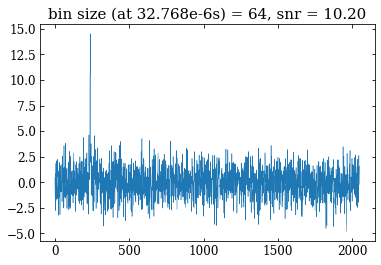

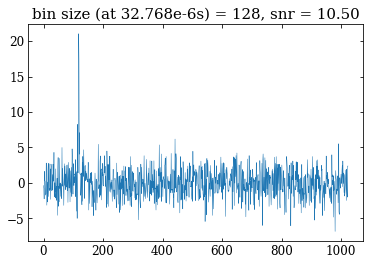

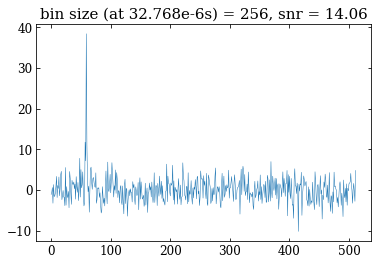

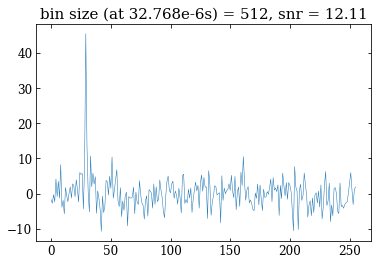

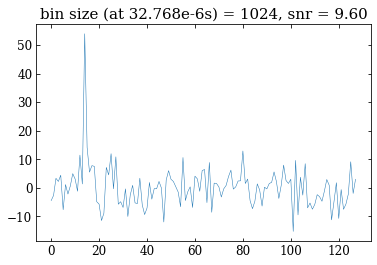

In [13]:
width_samp, width_samp_fine_pow2 = paper_fit.bin_best(bf_S1T2_c1, bd_heimdall)
bin_num = paper_fit.bin_number(bf_S1T2_c1, bd_heimdall, i_low, width_samp_fine_pow2)
print("width_samp, width_samp_fine_pow2, bin_num = ", width_samp, width_samp_fine_pow2, bin_num)

data_new_dm, dm_fit = paper_fit.Dedisperse_data_profile(bf_S1T2_c1, fil_file_heimdall, width_samp)

# plt.plot(data_new_dm.mean(0))
# plt.title("DM = %.2f"%dm_fit)
# plt.figure()
# plt.plot(data.mean(0))
# plt.title("DM = %.2f"%bd_heimdall.dm)

best_bin_snr = paper_fit.Compare_bins(data_new_dm, bd_heimdall, width_samp_fine_pow2)


## Will keep the cells below

In [31]:
import sys
sys.path.insert(1, '/home/ubuntu/gechen/software/burstfit/examples/')
import import_ipynb
import BurstFit_paper_template as paper_fit

from burstfit.utils.functions import pulse_fn, sgram_fn_vec, sgram_fn, gauss, gauss_norm, model_free_4, model_free_normalized_4, power_law # pulse_fn_vec  
from burstfit.utils.plotter import plot_fit_results
import numpy as np


def real_time_burstfit(candidate, datestring, beam, corr, snr_heimdall, dm_heimdall, width_heimdall,
                       voltage = False, dedisperse = True, mask_chans=[], nfreq = 4, save_plot = True
                      ):
    
    fil_file_dedispersed = '/home/ubuntu/gechen/software/burstfit/fil_files_dedispersed/%s_%d_%s.txt'%(candidate, nfreq, str(voltage))
    
    bd_heimdall, fil_file_heimdall  = paper_fit.prepare_bd(candidate, dm_heimdall, 
                                                           width_heimdall, snr_heimdall, 
                                                           datestring=datestring, beam=beam, 
                                                           corr=corr, voltage=False)


    data_burst, i_low, i_high = paper_fit.prepare_burst_data_heimdall_only(fil_file_heimdall, fil_file_dedispersed, 
                                                        candidate, bd_heimdall, 
                                                       t_chop_width = 5, dedisperse=dedisperse)
    
    profile_bounds=[(0, 0.5 / bd_heimdall.tsamp - i_low - bd_heimdall.width, 0, 0),(np.inf, 0.5 / bd_heimdall.tsamp - i_low + bd_heimdall.width, 5 * bd_heimdall.width, np.inf)]

    bf_S1T2_c1 = paper_fit.fit_paper_curvefit(bd_heimdall, data_burst, ['S', 'mu_t', 'sigma_t', 'tau'], pulse_fn, 
              profile_bounds, 
              ['c0', 'c1', 'c2'], model_free_normalized_4, fix_ncomp = True, ncomp = 1, plot = True)
    
    dm_fit, dm_fit_err = bf_S1T2_c1.sgram_params['all'][1]['popt'][-1], bf_S1T2_c1.sgram_params['all'][1]['perr'][-1]

    width_samp, width_samp_fine_pow2 = paper_fit.bin_best(bf_S1T2_c1, bd_heimdall)
    bin_num = paper_fit.bin_number(bf_S1T2_c1, bd_heimdall, i_low, width_samp_fine_pow2)
    print("width_samp, width_samp_fine_pow2, bin_num = ", width_samp, width_samp_fine_pow2, bin_num)

    data_new_dm, dm_fit = paper_fit.Dedisperse_data_profile(bf_S1T2_c1, fil_file_heimdall, width_samp)

    best_bin_snr = paper_fit.Compare_bins(data_new_dm, bd_heimdall, width_samp_fine_pow2)

    dict_burstfit = {
        "bf1_width_bins": width_samp_fine_pow2, # already converted to voltage resolution 
        "bf1_start_bins": bin_num, # already converted to voltage resolution
        "bf1_dm":dm_fit, 
        "bf1_dm_stddev": dm_fit_err,
        "bf1_reduced_chisq": bf_S1T2_c1.reduced_chi_sq,
        "bf1_pvalue": bf_S1T2_c1.p_value
    }
    
    if save_plot:
        plot_fit_results(bf_S1T2_c1.sgram, bf_S1T2_c1.sgram_model.evaluate, bf_S1T2_c1.sgram_params['all'][1]['popt'], 
                          bf_S1T2_c1.tsamp, bf_S1T2_c1.fch1, bf_S1T2_c1.foff, show=True, save=True, 
                         outname = 'bf1_' + candidate, 
                         outdir='/dataz/dsa110/operations/candidates/' + candidate + '/other')        
    
    return dict_burstfit


    



2022-06-29 20:35:39,848 - prepare_data -burstfit.data - INFO - Preparing data for burst fitting.
2022-06-29 20:35:40,721 - crop_dedispersed_data -burstfit.data - INFO - Cropping data with time_window: 0.2s.
2022-06-29 20:35:40,735 - normalise_data -burstfit.data - INFO - Normalising data using off pulse mean and std.
2022-06-29 20:35:40,800 - normalise_data -burstfit.data - INFO - Off pulse mean and std are: (36.063605401529635, 21.164850863543236)


using filterbank  /data/dsa110/T1/corr09/2022_3_29_23_4_54/fil_220330aaan/220330aaan_164.fil
Only using Heimdall filterbank.
0.5 0.000262144 5 32 1747 2067
1747 2067 320 (4, 320)
self.function_input_names:  ['S', 'mu', 'sigma', 'tau']
self.function_input_names:  ['c0', 'c1', 'c2']


2022-06-29 20:35:41,872 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-06-29 20:35:41,873 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-06-29 20:35:41,881 - tests -root - INFO - P values: T-test (0.94271), Kruskal (0.90986), KS (0.77281), F-test (0.09014)
2022-06-29 20:35:41,883 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-06-29 20:35:41,887 - tests -root - INFO - P values: T-test (0.00000), Kruskal (0.00000), KS (0.00000), F-test (0.00000)
2022-06-29 20:35:41,889 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-06-29 20:35:41,893 - tests -root - INFO - P values: T-test (0.00000), Kruskal (0.00000), KS (0.00000), F-test (0.00003)
2022-06-29 20:35:41,894 - fitall -burstfit.fit - WARNING - Input profile bounds detected. Using them for component 1
2022-06-29 20:35:41,896 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2022-06-29 20:35:41,898 - initial_profi

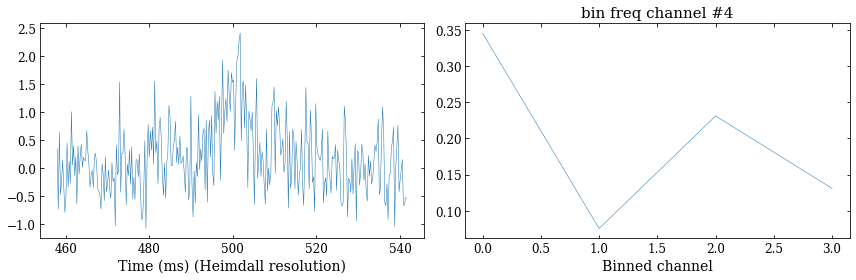

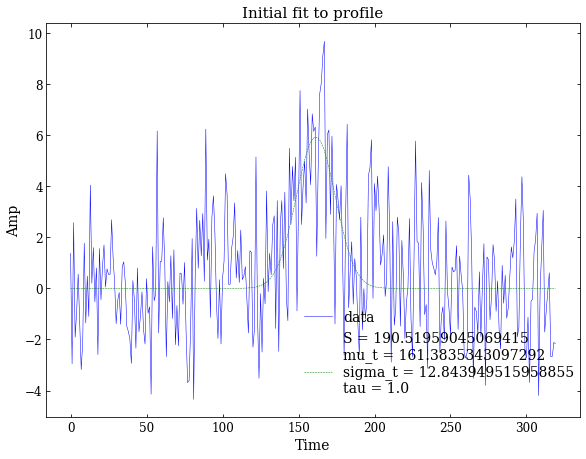

2022-06-29 20:35:42,493 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-06-29 20:35:42,496 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_normalized_4 at 0x7fb61a930268>
[0.39878002 0.23669735 0.47927672 0.16927181]


2022-06-29 20:35:42,505 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-06-29 20:35:42,507 - initial_spectrafit -burstfit.fit - INFO - c0: 0.3987800180912018 +- 0.0
2022-06-29 20:35:42,509 - initial_spectrafit -burstfit.fit - INFO - c1: 0.23669734597206116 +- 0.0
2022-06-29 20:35:42,510 - initial_spectrafit -burstfit.fit - INFO - c2: 0.47927671670913696 +- 0.0


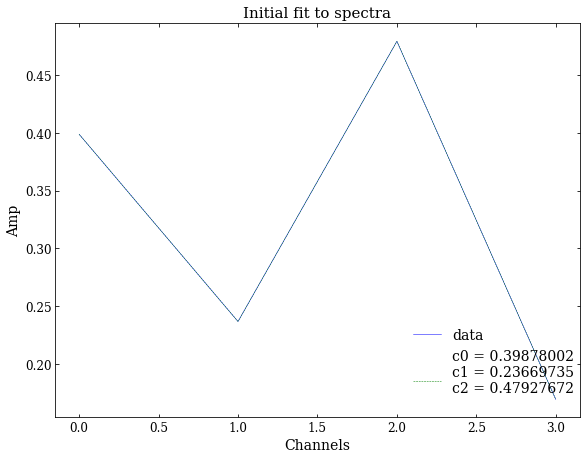

2022-06-29 20:35:42,667 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-06-29 20:35:42,671 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.39878002, 0.23669735, 0.47927672, 190.51959045069415, 161.3835343097292, 12.843949515958855, 1.0, 467.8]
2022-06-29 20:35:42,722 - run_fit -burstfit.curvefit - WARNING - Fit errors are not finite. Retrying with p0+-(0.2*p0) bounds
2022-06-29 20:35:43,527 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-06-29 20:35:43,530 - sgram_fit -burstfit.fit - INFO - c0: 0.3819557881701074 +- 0.039414699350632305
2022-06-29 20:35:43,532 - sgram_fit -burstfit.fit - INFO - c1: 0.24634351990731335 +- 0.03221056654570678
2022-06-29 20:35:43,546 - sgram_fit -burstfit.fit - INFO - c2: 0.4706683912134836 +- 0.03185597413271187
2022-06-29 20:35:43,549 - sgram_fit -burstfit.fit - INFO - S: 171.65449883907166 +- 4.470513376374713
2022-06-29 20:35:43,551 - sgram_fit -burstfit.fit - INFO - mu_t: 157

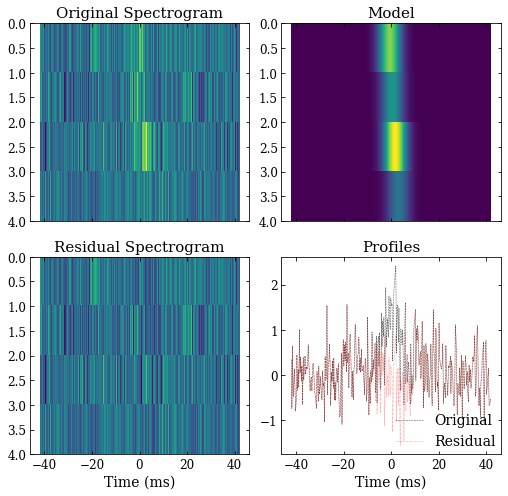

2022-06-29 20:35:44,127 - model -burstfit.fit - INFO - Making model.
2022-06-29 20:35:44,132 - model -burstfit.fit - INFO - Found 1 components.
2022-06-29 20:35:44,136 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-06-29 20:35:44,138 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-06-29 20:35:44,141 - model -burstfit.fit - INFO - Making model.
2022-06-29 20:35:44,143 - model -burstfit.fit - INFO - Found 1 components.
2022-06-29 20:35:44,147 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.2300534166419113
2022-06-29 20:35:44,150 - fitall -burstfit.fit - INFO - Fixed component exceeded. Terminated individual component fitting.
2022-06-29 20:35:44,151 - fitall -burstfit.fit - INFO - Final number of components = 1. Terminating fitting.
2022-06-29 20:35:44,154 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to

{bf}.calc_redchisq()= (1.2300534166419113, 2.9571803894512527e-08)
width_samp, width_samp_fine_pow2, bin_num =  31 128 119
64
128
256
512
1024
fine resolution bin size (at 32.768e-6s) that gives the max snr: 256


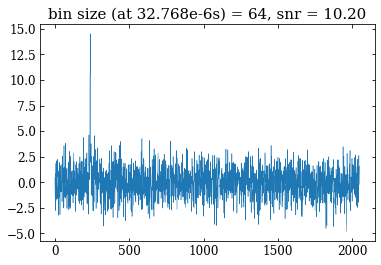

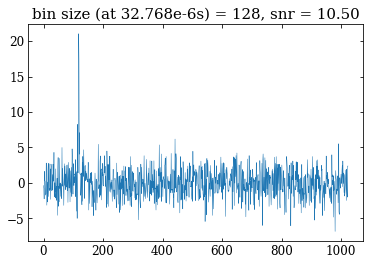

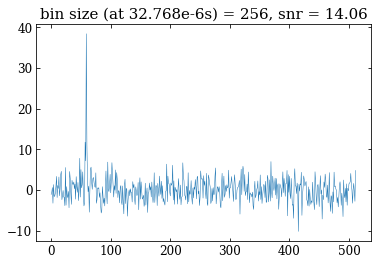

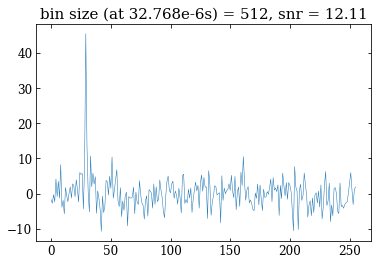

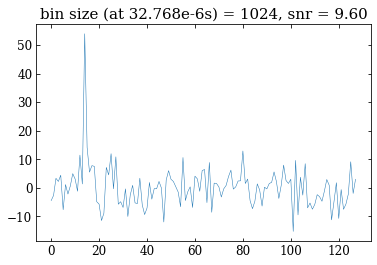

In [32]:
dict_func_test = real_time_burstfit(candidate, datestring, beam, corr, snr_heimdall, dm_heimdall, width_heimdall, save_plot=False)

In [33]:
dict_func_test

{'bf1_width_bins': 128,
 'bf1_start_bins': 119,
 'bf1_dm': 474.52522988553045,
 'bf1_dm_stddev': 1.6737556598976506,
 'bf1_reduced_chisq': 1.2300534166419113,
 'bf1_pvalue': 2.9571803894512527e-08}

In [2]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import sys
sys.path.insert(1, '/home/ubuntu/gechen/software/burstfit/examples/')
import import_ipynb
import burstfit.BurstFit_paper_template as paper_fit

from burstfit.utils.functions import pulse_fn, sgram_fn_vec, sgram_fn, gauss, gauss_norm, model_free_4, model_free_normalized_4, power_law # pulse_fn_vec  
from burstfit.utils.plotter import plot_fit_results
import numpy as np


def real_time_burstfit(candidate, datestring, beam, corr, snr_heimdall, dm_heimdall, width_heimdall,
                       voltage = False, dedisperse = True, mask_chans=[], nfreq = 4, save_plot = True,
                       plot = False
                      ):
    
    fil_file_dedispersed = '/home/ubuntu/gechen/software/burstfit/fil_files_dedispersed/%s_%d_%s.txt'%(candidate, nfreq, str(voltage))
    
    bd_heimdall, fil_file_heimdall  = paper_fit.prepare_bd(candidate, dm_heimdall, width_heimdall, snr_heimdall, datestring=datestring, beam=beam, corr=corr, voltage=False)

    data_burst, i_low, i_high = paper_fit.prepare_burst_data_heimdall_only(fil_file_heimdall, fil_file_dedispersed, candidate, bd_heimdall, t_chop_width = 5, dedisperse=dedisperse, plot = plot)
    
    # fit 
    profile_bounds=[(0, 0.5 / bd_heimdall.tsamp - i_low - bd_heimdall.width, 0, 0),(np.inf, 0.5 / bd_heimdall.tsamp - i_low + bd_heimdall.width, 5 * bd_heimdall.width, np.inf)]
    bf_S1T2_c1 = paper_fit.fit_paper_curvefit(bd_heimdall, data_burst, ['S', 'mu_t', 'sigma_t', 'tau'], pulse_fn, profile_bounds, ['c0', 'c1', 'c2'], model_free_normalized_4, fix_ncomp = True, ncomp = 1, plot = plot)
    
    dm_fit, dm_fit_err = bf_S1T2_c1.sgram_params['all'][1]['popt'][-1], bf_S1T2_c1.sgram_params['all'][1]['perr'][-1]

    width_samp, width_samp_fine_pow2 = paper_fit.bin_best(bf_S1T2_c1, bd_heimdall)
    bin_num = paper_fit.bin_number(bf_S1T2_c1, bd_heimdall, i_low, width_samp_fine_pow2)
    print("width_samp, width_samp_fine_pow2, bin_num = ", width_samp, width_samp_fine_pow2, bin_num)

    # compare SNR using new DM and adjecent bin widths 
    data_new_dm, dm_fit = paper_fit.Dedisperse_data_profile(bf_S1T2_c1, fil_file_heimdall, width_samp)
    best_bin_snr = paper_fit.Compare_bins(data_new_dm, bd_heimdall, width_samp_fine_pow2)

    # save optimal bin width and fit results 
    dict_burstfit = {
        "bf1_width_bins": width_samp_fine_pow2, # already converted to voltage resolution 
        "bf1_start_bins": bin_num, # already converted to voltage resolution
        "bf1_dm":dm_fit, 
        "bf1_dm_stddev": dm_fit_err,
        "bf1_reduced_chisq": bf_S1T2_c1.reduced_chi_sq,
        "bf1_pvalue": bf_S1T2_c1.p_value
    }
    
    if save_plot:
        plot_fit_results(bf_S1T2_c1.sgram, bf_S1T2_c1.sgram_model.evaluate, bf_S1T2_c1.sgram_params['all'][1]['popt'], 
                          bf_S1T2_c1.tsamp, bf_S1T2_c1.fch1, bf_S1T2_c1.foff, show=True, save=True, 
                         outname = 'bf1_' + candidate, 
                         outdir='/dataz/dsa110/operations/candidates/' + candidate + '/other')        
    
    return dict_burstfit


    



# In[ ]:
# 220330aaan 2022_3_29_23_4_54 164 corr09 12.9 467.8 32  

# candidate = str(sys.argv[1])
# datestring = str(sys.argv[2])
# beam = sys.argv[3]
# corr = str(sys.argv[4])
# snr_heimdall = sys.argv[5]
# dm_heimdall = sys.argv[6]
# width_heimdall = sys.argv[7]


print(candidate, datestring, beam, corr, snr_heimdall, dm_heimdall, width_heimdall)

real_time_burstfit(candidate, datestring, beam, corr, snr_heimdall, dm_heimdall, width_heimdall, save_plot=False)







/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg/burstfit/utils/plotter.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/home/ubuntu/anac

ModuleNotFoundError: No module named 'burstfit.BurstFit_paper_template'

In [2]:
import sys
sys.path.insert(1, '/home/ubuntu/gechen/software/burstfit/examples/')
import import_ipynb
from pathlib import Path
import BurstFit_paper_template as paper_fit

from burstfit.utils.functions import pulse_fn, sgram_fn_vec, sgram_fn, gauss, gauss_norm, model_free_4, model_free_normalized_4, power_law # pulse_fn_vec  
from burstfit.utils.plotter import plot_fit_results
import numpy as np


def real_time_burstfit(candidate, path_to_fil_file, snr_heimdall, dm_heimdall, width_heimdall,
                       voltage = False, dedisperse = True, mask_chans=[], nfreq = 4, save_plot = True,
                       plot = False
                      ): # datestring, beam, corr
    
    fil_file_dedispersed = '/home/ubuntu/gechen/software/burstfit/fil_files_dedispersed/%s_%d_%s.txt'%(candidate, nfreq, str(voltage))
    
    bd_heimdall, fil_file_heimdall  = paper_fit.prepare_bd(candidate, dm_heimdall, width_heimdall, snr_heimdall, voltage=False, path_to_fil_file = path_to_fil_file) # datestring=datestring, beam=beam, corr=corr

    data_burst, i_low, i_high = paper_fit.prepare_burst_data_heimdall_only(fil_file_heimdall, fil_file_dedispersed, candidate, bd_heimdall, t_chop_width = 5, dedisperse=dedisperse, plot = plot)
    
    # fit 
    profile_bounds=[(0, 0.5 / bd_heimdall.tsamp - i_low - bd_heimdall.width, 0, 0),(np.inf, 0.5 / bd_heimdall.tsamp - i_low + bd_heimdall.width, 5 * bd_heimdall.width, np.inf)]

    bf_S1T2_c1 = paper_fit.fit_paper_curvefit(bd_heimdall, data_burst, ['S', 'mu_t', 'sigma_t', 'tau'], pulse_fn, profile_bounds, ['c0', 'c1', 'c2'], model_free_normalized_4, fix_ncomp = True, ncomp = 1, plot = plot)
    
    # dm from fit 
    dm_fit, dm_fit_err = bf_S1T2_c1.sgram_params['all'][1]['popt'][-1], bf_S1T2_c1.sgram_params['all'][1]['perr'][-1]

    width_samp, width_samp_fine_pow2 = paper_fit.bin_best(bf_S1T2_c1, bd_heimdall)
    bin_num = paper_fit.bin_number(bf_S1T2_c1, bd_heimdall, i_low, width_samp_fine_pow2)
    #print("width_samp, width_samp_fine_pow2, bin_num = ", width_samp, width_samp_fine_pow2, bin_num)

    # dedisperse data using the new dm and compare SNR using adjecent bin widths
    data_new_dm, dm_fit = paper_fit.Dedisperse_data_profile(bf_S1T2_c1, fil_file_heimdall, width_samp)
    best_bin_snr = paper_fit.Compare_bins(data_new_dm, bd_heimdall, width_samp_fine_pow2, plot = plot)

    # save optimal bin width and fit results. 
    dict_burstfit = {
        "bf1_width_bins": width_samp_fine_pow2, # already converted to voltage resolution 
        "bf1_start_bins": bin_num, # already converted to voltage resolution
        "bf1_dm":dm_fit, 
        "bf1_dm_stddev": dm_fit_err,
        "bf1_reduced_chisq": bf_S1T2_c1.reduced_chi_sq,
        "bf1_pvalue": bf_S1T2_c1.p_value
    }
    
    if save_plot:
        save_plot_dir = "/dataz/dsa110/operations/candidates/" + candidate + "/other"
        Path(save_plot_dir).mkdir(parents=True, exist_ok=True)
        
        plot_fit_results(bf_S1T2_c1.sgram, bf_S1T2_c1.sgram_model.evaluate, bf_S1T2_c1.sgram_params['all'][1]['popt'], 
                          bf_S1T2_c1.tsamp, bf_S1T2_c1.fch1, bf_S1T2_c1.foff, show = False, save=True, 
                         outname = 'bf1_' + candidate, 
                         outdir = save_plot_dir)        
    
    return dict_burstfit

In [1]:
candidate = '220330aaan'

snr_heimdall = 12.9
dm_heimdall = 467.8
width_heimdall = 32 
path_to_fil_file = "/data/dsa110/T1/corr09/2022_3_29_23_4_54/fil_220330aaan/220330aaan_164.fil" 

real_time_burstfit(candidate, path_to_fil_file, snr_heimdall, dm_heimdall, width_heimdall, save_plot = True, plot = False)



NameError: name 'real_time_burstfit' is not defined

In [1]:
import burstfit.bf1 as bf1

/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg/burstfit/utils/plotter.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/home/ubuntu/anac

ModuleNotFoundError: No module named 'BurstFit_paper_template'